# Task 1.1 - Data Understanding `povertyByState.csv`

In [176]:
# This will take a while
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import plotly.offline as py


# Set a seed for reproducibility
np.random.seed(42)

# Import the dataset
# Poverty by state and year
df_poverty = pd.read_csv('../source/ds/povertyByStateYear.csv')


In [177]:
print("--"*50)
df_poverty.info()

----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              884 non-null    object 
 1   year               884 non-null    int64  
 2   povertyPercentage  832 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 20.8+ KB


In [178]:
## LOOK AROUND:
print(df_poverty.head())

# Informazioni sulle colonne, tipi di dati e presenza di valori nulli
print(df_poverty.info())

# Statistiche descrittive per colonne numeriche
#print(df_poverty.describe())



# Conteggio dei valori unici per ogni colonna
print("##########################################")
print("Counts unique values for each column")
print(df_poverty.nunique())

print("##########################################")
print("List of alle the values for the feature 'state'")
#problem: there are 52 states
unique_state_values = df_poverty['state'].unique()
print(unique_state_values)
print("##########################################")
#vedo il caso state = 'United States'
# Seleziona le righe in cui 'state' è 'United States'
print("values for us")
df_united_states = df_poverty[df_poverty['state'] == 'United States']
print(df_united_states)
##Dato che non posso ricavarci alcunchè -> elimino le righe con United States per quanto riguarda la feature State
df_poverty_filtered = df_poverty[df_poverty['state'] != 'United States']
print("##########################################")
print("Ristampo valori univoci per ciascuna colonna")
print(df_poverty_filtered.nunique())
##!!!!!
# terrei il district of columbia (Washington dc che non è uno stato dei 50 ma ha una popolazione decisamente numerosa e ha senso tenerlo in considerazione nell'analisi
##!!!!!

#print("##########################################")
#print()
# Conteggio dei valori unici per ogni colonna
#print("###Counts unique values for each column")
#print(df_poverty_filtered.nunique())
#print()
#unique_state_values = df_poverty_filtered['state'].unique()
#print(unique_state_values)

#####  step 2

# Conteggio dei dati mancanti per ogni colonna
#print("###Missing values for each column")
#print(df_poverty_filtered.isnull().sum())

## visualizzo i dati mancanti
#column_missing_values = 'povertyPercentage'
# Seleziona le righe con dati mancanti nella colonna specifica
#df_poverty_missing_povertyPercentage = df_poverty_filtered[df_poverty_filtered[column_missing_values].isnull()]

# Stampa le righe selezionate
#print(df_poverty_missing_povertyPercentage)

           state  year  povertyPercentage
0  United States  2020               11.5
1        Alabama  2020               14.8
2         Alaska  2020               11.5
3        Arizona  2020               12.1
4       Arkansas  2020               15.8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              884 non-null    object 
 1   year               884 non-null    int64  
 2   povertyPercentage  832 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 20.8+ KB
None
##########################################
Counts unique values for each column
state                 52
year                  17
povertyPercentage    146
dtype: int64
##########################################
List of alle the values for the feature 'state'
['United States' 'Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California'
 'Color

Data types for this dataset are correct: object for the state is ok, int for the year column and foat for povertyPercebtae by definition.
Problem: there are 52 states -> for district of columbia: make sense include it for the analysis but the value 'United states' can't be reshaped in a more fine grained value, so is dropped. 
NB: the choice of keepin' the DoColumbia value may be re-evaluated when the join of the 3 datasets will be performed

In [179]:
max_value_year = df_poverty_filtered['year'].max()
min_value_year = df_poverty_filtered['year'].min()
print(f"The range of the year for this dataset is {min_value_year};{max_value_year}")

max_value_perc = df_poverty_filtered['povertyPercentage'].max()
min_value_perc = df_poverty_filtered['povertyPercentage'].min()
print(f"The range of the povertyPercentage for this dataset is {min_value_perc};{max_value_perc}")

The range of the year for this dataset is 2004;2020
The range of the povertyPercentage for this dataset is 5.4;21.8


Now let's see some info regarding missing values

In [180]:
# Conteggio dei dati mancanti per ogni colonna
print("Missing values for each column:")
print(df_poverty_filtered.isnull().sum())

## visualizzo i dati mancanti

column_missing_values = 'povertyPercentage'
# Seleziona le righe con dati mancanti nella colonna specifica
df_poverty_missing_povertyPercentage = df_poverty_filtered[df_poverty_filtered[column_missing_values].isnull()]

# Stampa le righe selezionate
print(df_poverty_missing_povertyPercentage)

#### to mange the null data 2012
df_filt_pure = df_poverty_filtered
df_filt_pureB = df_poverty_filtered

Missing values for each column:
state                 0
year                  0
povertyPercentage    51
dtype: int64
                    state  year  povertyPercentage
417               Alabama  2012                NaN
418                Alaska  2012                NaN
419               Arizona  2012                NaN
420              Arkansas  2012                NaN
421            California  2012                NaN
422              Colorado  2012                NaN
423           Connecticut  2012                NaN
424              Delaware  2012                NaN
425  District of Columbia  2012                NaN
426               Florida  2012                NaN
427               Georgia  2012                NaN
428                Hawaii  2012                NaN
429                 Idaho  2012                NaN
430              Illinois  2012                NaN
431               Indiana  2012                NaN
432                  Iowa  2012                NaN
433             

In [181]:

alternative_poverty_percentage = df_poverty_filtered.groupby('year')['povertyPercentage'].mean()
print("alternative poverty percentage", alternative_poverty_percentage)

median_poverty_percentage = df_poverty_filtered[df_poverty_filtered['year'] != 2012]['povertyPercentage'].median()





# Farei una media pesata con i valori degli anni successivi e precedenti dando imoportanza agli anni più vicini
# Weight the years from 2004 to 2020, for each years of distance the weights is a gaussian centered in 2012 but without having 2012 
# So we spread a gaussian going from center (2012 to estremes 2004 and 2020)

years_list = df_poverty_filtered['year'].unique()
years_list = np.sort(years_list)

sigma = 4
# This step take the years and substract then take the square to make the differences all positive
# then we divide by 2*sigma^2 in order to have a gaussian centered in 2012
gaussian_weighting = np.exp(-np.square(years_list - 2012)/(2*sigma**2))

# remove 12th value from the gaussian weighting
gaussian_weighting = np.delete(gaussian_weighting, 8)
print("gaussian weighting")
print(gaussian_weighting)
# remove 2012 from alternative poverty percentage
alternative_poverty_percentage = alternative_poverty_percentage.drop(2012)

# apply gaussian weighting to the poverty percentage b multipling each year for the corresponding weight and then divide by the sum of the weights
expected_poverty_percentage = np.sum(alternative_poverty_percentage * gaussian_weighting) / np.sum(gaussian_weighting)

print("expected poverty percentage \n", expected_poverty_percentage)


years_list = df_poverty_filtered['year'].unique()
years_list = np.sort(years_list)

sigma = 4
# This step take the years and substract then take the square to make the differences all positive
# then we divide by 2*sigma^2 in order to have a gaussian centered in 2012
gaussian_weighting = np.exp(-np.square(years_list - 2012)/(2*sigma**2))

# remove 12th value from the gaussian weighting
gaussian_weighting = np.delete(gaussian_weighting, 8)
print("gaussian weighting")
print(gaussian_weighting)
# remove 2012 from alternative poverty percentage

# apply gaussian weighting to the poverty percentage b multipling each year for the corresponding weight and then divide by the sum of the weights
expected_poverty_percentage = np.sum(alternative_poverty_percentage * gaussian_weighting) / np.sum(gaussian_weighting)

print("expected poverty percentage\n", expected_poverty_percentage)

df_poverty_filtered.loc[df_poverty_filtered['year'] == 2012, 'povertyPercentage'] = expected_poverty_percentage
print("Missing values for each column")
print(df_poverty_filtered.isnull().sum())

# Filtra il DataFrame solo per l'anno 2012
df_pov2012 = df_poverty_filtered[df_poverty_filtered['year'] == 2012]
print(df_pov2012.head()[['state', 'povertyPercentage']])

df_prova=df_poverty_filtered


alternative poverty percentage year
2004    12.074510
2005    11.970588
2006    12.058824
2007    12.635294
2008    13.447059
2009    13.973077
2010    14.376000
2011    14.209804
2012          NaN
2013    13.715686
2014    13.135294
2015    12.498039
2016    12.033333
2017    11.270588
2018    10.972549
2019    10.884314
2020    11.170588
Name: povertyPercentage, dtype: float64
gaussian weighting
[0.13533528 0.21626517 0.32465247 0.45783336 0.60653066 0.7548396
 0.8824969  0.96923323 0.96923323 0.8824969  0.7548396  0.60653066
 0.45783336 0.32465247 0.21626517 0.13533528]
expected poverty percentage 
 13.03046576793185
gaussian weighting
[0.13533528 0.21626517 0.32465247 0.45783336 0.60653066 0.7548396
 0.8824969  0.96923323 0.96923323 0.8824969  0.7548396  0.60653066
 0.45783336 0.32465247 0.21626517 0.13533528]
expected poverty percentage
 13.03046576793185
Missing values for each column
state                0
year                 0
povertyPercentage    0
dtype: int64
          stat

Spiegazione gaussian weighted method #todo
In alterantiva, mostriamo il metodo semplice di sostituzione del valore con la mediana:

In [182]:

#################################### Calcola la mediana della poverty percentage escludendo il 2012
poverty_fil_perc = df_filt_pure
median_poverty_percentage = poverty_fil_perc[poverty_fil_perc['year'] != 2012]['povertyPercentage'].median()

# Imputa i dati mancanti nel 2012 con la mediana calcolata
poverty_fil_perc.loc[poverty_fil_perc['year'] == 2012, 'povertyPercentage'] = median_poverty_percentage

# controllo se andato a buon fine:
print("Missing values for each column")
print(poverty_fil_perc.isnull().sum())
variabile_d_appoggio = poverty_fil_perc[df_poverty_filtered['year'] == 2012]

# Stampa le percentuali di povertà per tutti gli stati nel 2012
print(variabile_d_appoggio.head()[['state', 'povertyPercentage']])




Missing values for each column
state                0
year                 0
povertyPercentage    0
dtype: int64
          state  povertyPercentage
417     Alabama               12.0
418      Alaska               12.0
419     Arizona               12.0
420    Arkansas               12.0
421  California               12.0


## Poverty percentage of states

In [183]:
#todo 
"""
sns.set(style="whitegrid")

# Create a boxplot to visualize the distribution
plt.boxplot(df_poverty['povertyPercentage'], vert=True)  # vert=False makes it horizontal
plt.xlabel('poverty %')
plt.title('Boxplot of Povery percentage')
plt.show()
"""


'\nsns.set(style="whitegrid")\n\n# Create a boxplot to visualize the distribution\nplt.boxplot(df_poverty[\'povertyPercentage\'], vert=True)  # vert=False makes it horizontal\nplt.xlabel(\'poverty %\')\nplt.title(\'Boxplot of Povery percentage\')\nplt.show()\n'

## Title
Given the nature of poverty percentage data type, can use the boxplot just to see if there are any outliers.
To know the distribution -> histogram 

no outliers
State with highest peverty percentage: New Mexico, 2013: 21.8
State with lowest peverty percentage: New Hampshire, 2018: 5.4

(!) Looking at the distribution of mean(poverty percentage) for all the states wrt the years we can do some considerations:
    - mean of poverty percentage increases starting from 2007/2008 until 2010 
    - real estate/finance bailout -> unemployment -> mean increases
    - from now on decreases until 2008 (exept for 2011->2012-2013) this is given by the fact that in thoose years USA's economy booted up
    - 2011--decrease--> 2012--increase-> 2013: this behaviour is given by the fact that we replaced 2012 NaN values, but we'll not make effort in reconstructing it because we are gonna DROP VALUES FROM 2012 CUZ INCIDENTS START FROM 2013

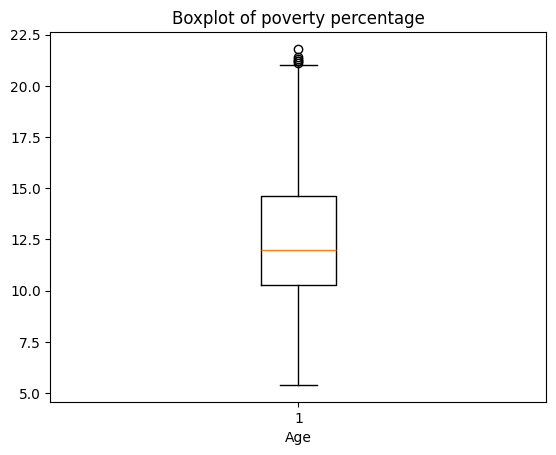

State with highest peverty percentage:
state                New Mexico
year                       2013
povertyPercentage          21.8
Name: 396, dtype: object
value: 21.8%
State with lowest peverty percentage:
state                New Hampshire
year                          2018
povertyPercentage              5.4
Name: 134, dtype: object
value: 5.4%


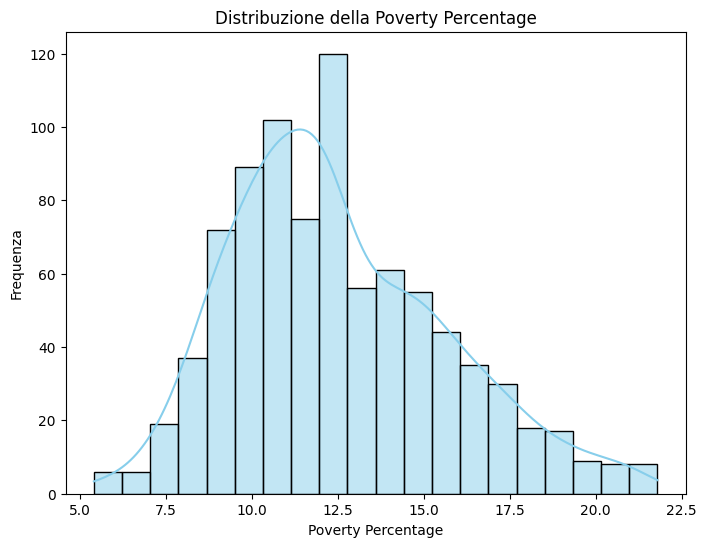

Percentili (Q1, Mediana, Q3): [10.3 12.  14.6]


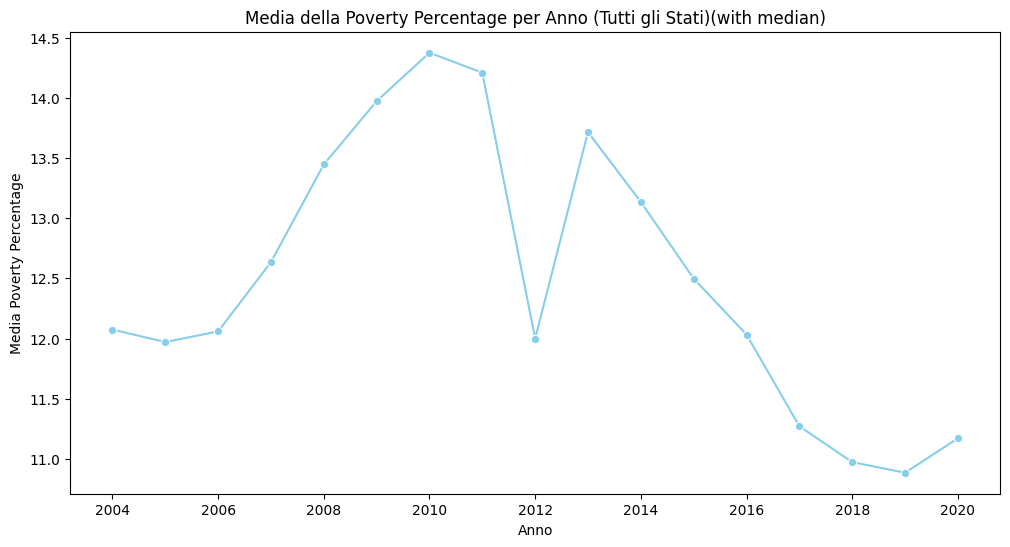

In [184]:
# Create a boxplot to visualize the distribution
filtered_data = df_poverty_filtered['povertyPercentage']
plt.boxplot(filtered_data, vert=True)  # vert=False makes it horizontal
plt.xlabel('Age')
plt.title('Boxplot of poverty percentage')
plt.show()

state_highest_poverty = df_poverty.loc[df_poverty['povertyPercentage'].idxmax()]
print("State with highest peverty percentage:")
print(state_highest_poverty)
highest_poverty_percentage = state_highest_poverty['povertyPercentage']
print(f"value: {highest_poverty_percentage}%")

state_low_poverty = df_poverty.loc[df_poverty['povertyPercentage'].idxmin()]
print("State with lowest peverty percentage:")
print(state_low_poverty)
low_poverty_percentage = state_low_poverty['povertyPercentage']
print(f"value: {low_poverty_percentage}%")

# histogram
plt.figure(figsize=(8, 6))
sns.histplot(df_poverty_filtered['povertyPercentage'], bins=20, kde=True, color='skyblue')
plt.title('Distribuzione della Poverty Percentage')
plt.xlabel('Poverty Percentage')
plt.ylabel('Frequenza')
plt.show()

percentiles = np.percentile(df_poverty_filtered['povertyPercentage'], [25, 50, 75])
print("Percentili (Q1, Mediana, Q3):", percentiles)


""""
# Calcola la media della povertyPercentage per ogni anno
mean_poverty = df_poverty_filtered.groupby('year')['povertyPercentage'].mean().reset_index()
# Plot del grafico a linee della media della povertyPercentage per tutti gli stati
plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_poverty, x='year', y='povertyPercentage', marker='o', color='skyblue')
plt.title('Media della Poverty Percentage per Anno (Tutti gli Stati)')
plt.xlabel('Anno')
plt.ylabel('Media Poverty Percentage')
plt.show()
"""



### now with df of 2012 percPov reconstructed via median: poverty_fil_perc
#poverty_fil_perc
# Calcola la mediana della povertyPercentage per ogni anno
mean_pov = poverty_fil_perc.groupby('year')['povertyPercentage'].mean().reset_index()

# Plot del grafico a linee della media della povertyPercentage per tutti gli stati
plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_pov, x='year', y='povertyPercentage', marker='o', color='skyblue')
plt.title('Media della Poverty Percentage per Anno (Tutti gli Stati)(with median)')
plt.xlabel('Anno')
plt.ylabel('Media Poverty Percentage')
plt.show()

REMOVING THE NaNs for the years 2012 the shape of the distribution(mean(povertyPercentage)) give us a coherent distribution

          state  povertyPercentage
417     Alabama               12.0
418      Alaska               12.0
419     Arizona               12.0
420    Arkansas               12.0
421  California               12.0


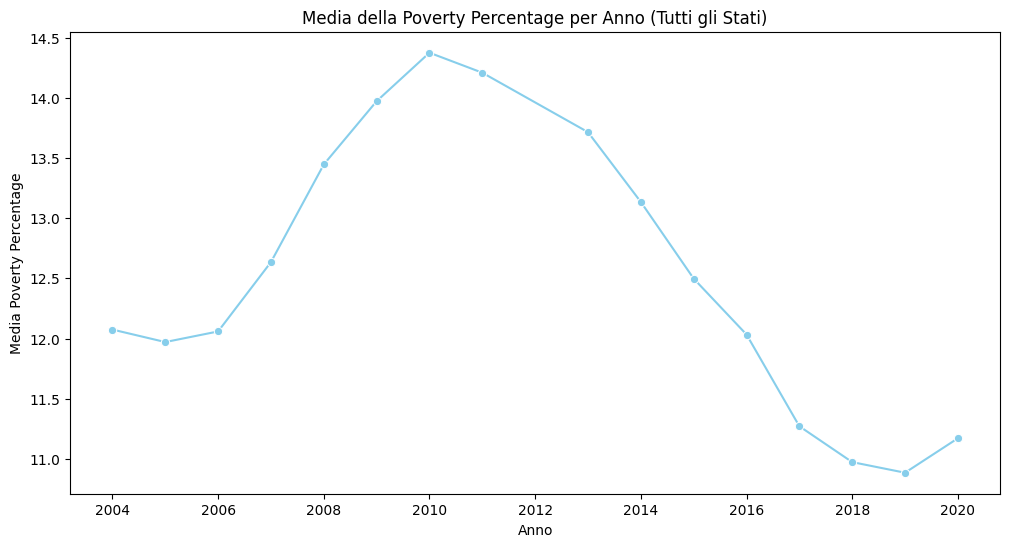

In [185]:

# Elimina le righe in cui l'anno è il 2012
df_poverty_noNan = df_poverty_filtered[df_poverty_filtered['year'] != 2012]
# Filtra il DataFrame solo per l'anno 2012
rty_2012 = df_prova[df_prova['year'] == 2012]
print(rty_2012.head()[['state', 'povertyPercentage']])


# Calcola la mediana della povertyPercentage per ogni anno
mean_pov = df_poverty_noNan.groupby('year')['povertyPercentage'].mean().reset_index()
# Plot del grafico a linee della media della povertyPercentage per tutti gli stati
plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_pov, x='year', y='povertyPercentage', marker='o', color='skyblue')
plt.title('Media della Poverty Percentage per Anno (Tutti gli Stati)')
plt.xlabel('Anno')
plt.ylabel('Media Poverty Percentage')
plt.show()

## from now use the datafreame: df_poverty_noNan


             state  year  povertyPercentage
396     New Mexico  2013               21.8
500     New Mexico  2011               21.4
701    Mississippi  2007               21.3
649    Mississippi  2008               21.2
539      Louisiana  2010               21.2
..             ...   ...                ...
810  New Hampshire  2005                5.6
186  New Hampshire  2017                5.6
82   New Hampshire  2019                5.6
862  New Hampshire  2004                5.5
134  New Hampshire  2018                5.4

[816 rows x 3 columns]


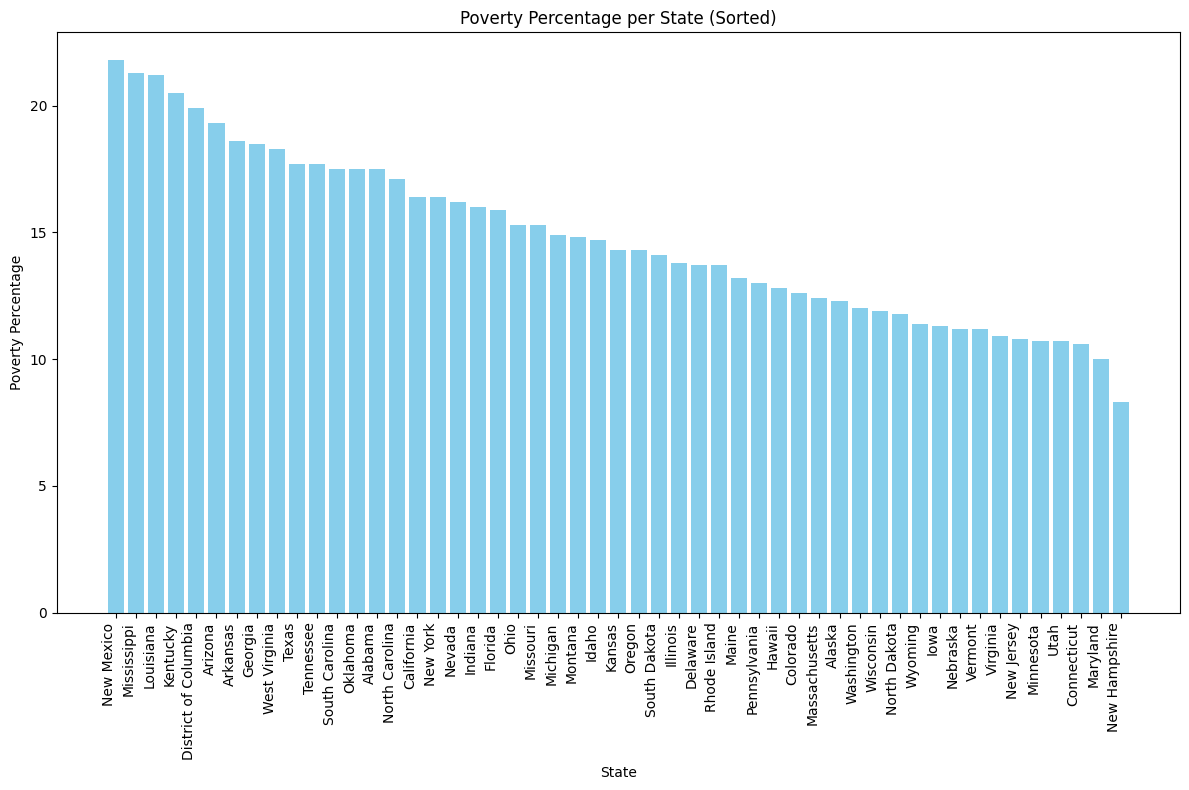

                    state  year  povertyPercentage
396            New Mexico  2013               21.8
500            New Mexico  2011               21.4
701           Mississippi  2007               21.3
649           Mississippi  2008               21.2
539             Louisiana  2010               21.2
805           Mississippi  2005               21.1
597           Mississippi  2009               21.0
383             Louisiana  2013               21.0
337           Mississippi  2014               20.8
545           Mississippi  2010               20.6
493           Mississippi  2011               20.6
331             Louisiana  2014               20.6
487             Louisiana  2011               20.5
753           Mississippi  2006               20.5
382              Kentucky  2013               20.5
552            New Mexico  2010               20.3
389           Mississippi  2013               20.1
279             Louisiana  2015               20.0
604            New Mexico  2009

In [186]:
df_poverty_sorted = df_poverty_noNan.sort_values(by='povertyPercentage', ascending=False)
print(df_poverty_sorted)
# Creazione di un grafico a barre della poverty percentage per ogni stato
plt.figure(figsize=(12, 8))
plt.bar(df_poverty_sorted['state'], df_poverty_sorted['povertyPercentage'], color='skyblue')
plt.title('Poverty Percentage per State (Sorted)')
plt.xlabel('State')
plt.ylabel('Poverty Percentage')
plt.xticks(rotation=90, ha='right')  # Rotazione delle etichette degli stati per una migliore leggibilità
plt.tight_layout()

# Mostra il grafico
plt.show()

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(df_poverty_sorted)
# Ripristina le opzioni predefinite dopo la stampa
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

# Visualization are nice, let's visualize poverty



In [187]:
import plotly.express as px
import pandas as pd
import numpy as np


# dataset poverty
df_poverty = pd.read_csv('../source/ds/povertyByStateYear.csv')

df_poverty.head()

# Create dictionary state (two letter)
dict_state = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
} 

print("number of states", len(df_poverty[df_poverty.state!='United States'].state.unique()))

poverties = df_poverty[df_poverty.state!='United States'].groupby('state').povertyPercentage.mean()
states = df_poverty[df_poverty.state!='United States'].state.unique()
states_abb = [dict_state[st] for st in df_poverty[df_poverty.state != 'United States'].state.unique()]
fig= px.choropleth(locations=states_abb, locationmode='USA-states', color=poverties, scope='usa', color_continuous_scale='Reds', range_color=(np.min(poverties), np.max(poverties)), title='Mean poverty percentage per state in USA')
fig.show()

number of states 51


# Final cleaning on poverty dataset

since incidents dataset starts from 2013, will remove from current poverty dataframe also rows with year value < 2012 (2012 already erased)

In [188]:
# Final cleaning on poverty dataset
df_poverty_before_merge = df_poverty_noNan[df_poverty_noNan['year'] > 2012]
# check the range of the years
anno_minimo = df_poverty_before_merge['year'].min()
anno_massimo = df_poverty_before_merge['year'].max()
print(f"il range degli anni è {anno_minimo};{anno_massimo}")


il range degli anni è 2013;2020


# final poverty percentage dataframe: 
df_poverty_before_merge

# # Task 1.1 - Data Understanding `year_state_district_house.csv`

In [189]:

# Year-state-district-house
df_ys = pd.read_csv('../source/ds/year_state_district_house.csv')

print(df_ys.head())
print(df_ys.info())

   year    state  congressional_district       party  candidatevotes  \
0  1976  ALABAMA                       1  REPUBLICAN           98257   
1  1976  ALABAMA                       2  REPUBLICAN           90069   
2  1976  ALABAMA                       3    DEMOCRAT          106935   
3  1976  ALABAMA                       4    DEMOCRAT          141490   
4  1976  ALABAMA                       5    DEMOCRAT          113553   

   totalvotes  
0      157170  
1      156362  
2      108048  
3      176022  
4      113560  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10441 entries, 0 to 10440
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   year                    10441 non-null  int64 
 1   state                   10441 non-null  object
 2   congressional_district  10441 non-null  int64 
 3   party                   10441 non-null  object
 4   candidatevotes          10441 non-null  int64 

# Party


Convert the column party in categorical since it is object:

In [190]:
df_ys['party'] = df_ys['party'].astype('category')
print(df_ys.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10441 entries, 0 to 10440
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   year                    10441 non-null  int64   
 1   state                   10441 non-null  object  
 2   congressional_district  10441 non-null  int64   
 3   party                   10441 non-null  category
 4   candidatevotes          10441 non-null  int64   
 5   totalvotes              10441 non-null  int64   
dtypes: category(1), int64(4), object(1)
memory usage: 418.4+ KB
None


In [191]:
# Conteggio dei valori unici per ogni colonna
print("##########################################")
print("Counts unique values for each column")
print(df_ys.nunique())
print("##########################################")
print("List of alle the values for the feature 'party'")
unique_state_values = df_ys['party'].unique()
print(unique_state_values)


##########################################
Counts unique values for each column
year                         24
state                        51
congressional_district       54
party                         6
candidatevotes             9927
totalvotes                10033
dtype: int64
##########################################
List of alle the values for the feature 'party'
['REPUBLICAN', 'DEMOCRAT', 'FOGLIETTA (DEMOCRAT)', 'DEMOCRATIC-FARMER-LABOR', 'INDEPENDENT', 'INDEPENDENT-REPUBLICAN']
Categories (6, object): ['DEMOCRAT', 'DEMOCRATIC-FARMER-LABOR', 'FOGLIETTA (DEMOCRAT)', 'INDEPENDENT', 'INDEPENDENT-REPUBLICAN', 'REPUBLICAN']


PARTY
Since FOGLIETTA (DEMOCRAT)' (value for column party) is a democrat and represent a categorty, it will be replaced with DEMOCRAT
Also 'DEMOCRATIC-FARMER-LABOR' need to be replaced cuz is just local affiliate of the natioal party DEMOCRAT
Since 'INDEPENDENT-REPUBLICAN'is a better specification on 'INDEPENDET' will keep just 'INDEPENDENT'

In [192]:
df_ys.replace({'FOGLIETTA (DEMOCRAT)': 'DEMOCRAT'}, inplace=True)
df_ys.replace({'DEMOCRATIC-FARMER-LABOR': 'DEMOCRAT'}, inplace=True)
df_ys.replace({'INDEPENDENT-REPUBLICAN': 'INDEPENDENT'}, inplace=True)

# Conteggio dei valori unici per ogni colonna
print("##########################################")
print("Counts unique values for each column")
print(df_ys.nunique())
print("##########################################")
print("List of alle the values for the feature 'party'")
unique_state_values = df_ys['party'].unique()
print(unique_state_values)


##########################################
Counts unique values for each column
year                         24
state                        51
congressional_district       54
party                         3
candidatevotes             9927
totalvotes                10033
dtype: int64
##########################################
List of alle the values for the feature 'party'
['REPUBLICAN', 'DEMOCRAT', 'INDEPENDENT']
Categories (3, object): ['DEMOCRAT', 'INDEPENDENT', 'REPUBLICAN']


# State

Check if the state are correct:

In [193]:
print("##########################################")
print("List of alle the values for the feature ''")
unique_state_values = df_ys['state'].unique()
print(unique_state_values)

##########################################
List of alle the values for the feature ''
['ALABAMA' 'ALASKA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO'
 'CONNECTICUT' 'DELAWARE' 'FLORIDA' 'GEORGIA' 'HAWAII' 'IDAHO' 'ILLINOIS'
 'INDIANA' 'IOWA' 'KANSAS' 'KENTUCKY' 'LOUISIANA' 'MAINE' 'MARYLAND'
 'MASSACHUSETTS' 'MICHIGAN' 'MINNESOTA' 'MISSISSIPPI' 'MISSOURI' 'MONTANA'
 'NEBRASKA' 'NEVADA' 'NEW HAMPSHIRE' 'NEW JERSEY' 'NEW MEXICO' 'NEW YORK'
 'NORTH CAROLINA' 'NORTH DAKOTA' 'OHIO' 'OKLAHOMA' 'OREGON' 'PENNSYLVANIA'
 'RHODE ISLAND' 'SOUTH CAROLINA' 'SOUTH DAKOTA' 'TENNESSEE' 'TEXAS' 'UTAH'
 'VERMONT' 'VIRGINIA' 'WASHINGTON' 'WEST VIRGINIA' 'WISCONSIN' 'WYOMING'
 'DISTRICT OF COLUMBIA']


States are 51 including as a stase the District of columbia. Let's also check the `year`:


# year

In [194]:
max_value_year = df_ys['year'].max()
min_value_year = df_ys['year'].min()
print(f"The range of the year for this dataset is {min_value_year};{max_value_year}")
#range of poverty ds is year 2004-2020

# Stampa la data minima e massima
print("Data Minima:", min_value_year)
print("Data Massima:", max_value_year)

The range of the year for this dataset is 1976;2022
Data Minima: 1976
Data Massima: 2022


IMPORTANTE: le date del dataset `incidents` vanno 2013-2020; di `povertyByState` cleaned 2013-2020; di `state house` 1976-2020 
Rimuovo le date di state house ds dal '76 al 2013.

In [195]:
df_ys_date = df_ys[df_ys['year'] >= 2013]
max_value_year = df_ys_date['year'].max()
min_value_year = df_ys_date['year'].min()
print(f"The range of the year for this dataset is {min_value_year};{max_value_year}")

The range of the year for this dataset is 2014;2022


We don't have data related to party wins in 2013 -> because there were no elections/polls

Check on null values  and duplicates for the dataset:

In [196]:
# Stampa il numero di valori nulli per ciascuna colonna
print(df_ys_date.isnull().sum())

# Controlla i valori duplicati in tutto il DataFrame
duplicati = df_ys_date.duplicated()

# Stampa le righe duplicate
print("Righe duplicate:")
print(df_ys_date[duplicati])

year                      0
state                     0
congressional_district    0
party                     0
candidatevotes            0
totalvotes                0
dtype: int64
Righe duplicate:
Empty DataFrame
Columns: [year, state, congressional_district, party, candidatevotes, totalvotes]
Index: []


# congressional_district

In [197]:
zero_values = df_ys_date[df_ys_date['congressional_district'] == 0]

# Stampa le righe risultanti
print("Righe con 'congressional_district' uguale a zero:")
print(zero_values)
np.sum(np.isnan(df_ys_date['congressional_district']))

Righe con 'congressional_district' uguale a zero:
       year                 state  congressional_district       party  \
8272   2014                ALASKA                       0  REPUBLICAN   
8351   2014              DELAWARE                       0    DEMOCRAT   
8497   2014               MONTANA                       0  REPUBLICAN   
8562   2014          NORTH DAKOTA                       0  REPUBLICAN   
8616   2014          SOUTH DAKOTA                       0  REPUBLICAN   
8666   2014               VERMONT                       0    DEMOCRAT   
8699   2014               WYOMING                       0  REPUBLICAN   
8707   2016                ALASKA                       0  REPUBLICAN   
8786   2016              DELAWARE                       0    DEMOCRAT   
8932   2016               MONTANA                       0  REPUBLICAN   
8997   2016          NORTH DAKOTA                       0  REPUBLICAN   
9051   2016          SOUTH DAKOTA                       0  REPUBLICAN   
9

0

 We have many null values for congressional_district and will be not useful for our task, drop this column

In [198]:
# DO NOT remove column distrectional_district
# Pefrom check on congressional_district value per year per state to be able to derive insights when merging with incidents respect to
# most violent district, which is the political preference of the most violent district, etc.
#df_ys_date_no_congress = df_ys_date.drop(columns=['congressional_district'])
df_ys_date_no_congress =  df_ys_date
print(df_ys_date_no_congress.head(50))

      year       state  congressional_district       party  candidatevotes  \
8265  2014     ALABAMA                       1  REPUBLICAN          103758   
8266  2014     ALABAMA                       2  REPUBLICAN          113103   
8267  2014     ALABAMA                       3  REPUBLICAN          103558   
8268  2014     ALABAMA                       4  REPUBLICAN          132831   
8269  2014     ALABAMA                       5  REPUBLICAN          115338   
8270  2014     ALABAMA                       6  REPUBLICAN          135945   
8271  2014     ALABAMA                       7    DEMOCRAT          133687   
8272  2014      ALASKA                       0  REPUBLICAN          142572   
8273  2014     ARIZONA                       1    DEMOCRAT           97391   
8274  2014     ARIZONA                       2  REPUBLICAN          109704   
8275  2014     ARIZONA                       3    DEMOCRAT           58192   
8276  2014     ARIZONA                       4  REPUBLICAN      

#### Considerations about `totalvotes`, `candidatevotes`
We may try to extract some insights like if in a given state a party have more votes but at the same time the opposition party gained the State Federal Goverment seat as they won the majority of the district.
At the end, we can drop the two column and aggregate,for each year and each state, the winner party, renaming the column in `winner_party`.

In [199]:
### Check if the two columns have zero values
print(np.count_nonzero(df_ys_date['totalvotes']==0))
print(np.count_nonzero(df_ys_date['candidatevotes']==0))


1
1


# totalvotes and candidatevotes
independently from the presence of missing values, dulìplicated, out of range values, ... -> we drop the theese two columns since are not useful for our task: considerations can be done within the dataset (like electors have partecipated to the polls) but not useful for the global considerations driven by the merge of the whole 3 datasets

In [200]:
df_ys_date_no_candidate = df_ys_date_no_congress.drop(columns=['candidatevotes'])
df_ys_date_no_total_votes = df_ys_date_no_candidate.drop(columns=['totalvotes'])
print(df_ys_date_no_total_votes.head())
df_ys_cleaned=df_ys_date_no_total_votes

      year    state  congressional_district       party
8265  2014  ALABAMA                       1  REPUBLICAN
8266  2014  ALABAMA                       2  REPUBLICAN
8267  2014  ALABAMA                       3  REPUBLICAN
8268  2014  ALABAMA                       4  REPUBLICAN
8269  2014  ALABAMA                       5  REPUBLICAN


DS is cleaned: use df_ys_cleaned

### Frequency of party winning in each states

Vedere quante volte c'è un singolo partito ha vinto negli anni per ogni stato

In [201]:
# Raggruppa per 'state', 'party' e conta le occorrenze
conteggio_vittorie = df_ys_cleaned.groupby(['state', 'party', 'year']).size().reset_index(name='conteggio')
print(conteggio_vittorie)

import matplotlib.pyplot as plt

"""
#GRAFICO a torta per vedere la per ogni stato la percentuale di vittorie che ha raggiunto ogni ogni partito
for stato in df_ys_cleaned['state'].unique():
    # Filtra il DataFrame per uno stato specifico
    df_stato = conteggio_vittorie[conteggio_vittorie['state'] == stato]

    # Crea un diagramma a torta per lo stato corrente
    plt.figure(figsize=(2, 2))
    plt.pie(df_stato['conteggio'], labels=df_stato['party'], autopct='%1.1f%%', startangle=90)
    plt.title(f'Party Wins in {stato}')
    plt.show()
"""

       state       party  year  conteggio
0    ALABAMA    DEMOCRAT  2014          1
1    ALABAMA    DEMOCRAT  2016          1
2    ALABAMA    DEMOCRAT  2018          1
3    ALABAMA    DEMOCRAT  2020          1
4    ALABAMA    DEMOCRAT  2022          1
..       ...         ...   ...        ...
760  WYOMING  REPUBLICAN  2014          1
761  WYOMING  REPUBLICAN  2016          1
762  WYOMING  REPUBLICAN  2018          1
763  WYOMING  REPUBLICAN  2020          1
764  WYOMING  REPUBLICAN  2022          1

[765 rows x 4 columns]


"\n#GRAFICO a torta per vedere la per ogni stato la percentuale di vittorie che ha raggiunto ogni ogni partito\nfor stato in df_ys_cleaned['state'].unique():\n    # Filtra il DataFrame per uno stato specifico\n    df_stato = conteggio_vittorie[conteggio_vittorie['state'] == stato]\n\n    # Crea un diagramma a torta per lo stato corrente\n    plt.figure(figsize=(2, 2))\n    plt.pie(df_stato['conteggio'], labels=df_stato['party'], autopct='%1.1f%%', startangle=90)\n    plt.title(f'Party Wins in {stato}')\n    plt.show()\n"

In [202]:
# lo dropperei, quando lo fatto sembrava sembrava avesse ma ora sembra non abbia senso
"""
# Raggruppa i dati per 'state' e 'party' e conta il numero di occorrenze
grouped_data = df_ys_date.groupby(['state', 'party']).size().unstack()

# Visualizza un grafico a barre
grouped_data.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.xlabel('State')
plt.ylabel('Number of Occurrences')
plt.title('Party Wins by State')
plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

conteggio_party_per_stato = df_ys_date .groupby(['state', 'party']).size().reset_index(name='conteggio')
# Visualizza il conteggio
print(conteggio_party_per_stato)
"""

"\n# Raggruppa i dati per 'state' e 'party' e conta il numero di occorrenze\ngrouped_data = df_ys_date.groupby(['state', 'party']).size().unstack()\n\n# Visualizza un grafico a barre\ngrouped_data.plot(kind='bar', stacked=True, figsize=(15, 8))\nplt.xlabel('State')\nplt.ylabel('Number of Occurrences')\nplt.title('Party Wins by State')\nplt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')\nplt.show()\n\nconteggio_party_per_stato = df_ys_date .groupby(['state', 'party']).size().reset_index(name='conteggio')\n# Visualizza il conteggio\nprint(conteggio_party_per_stato)\n"

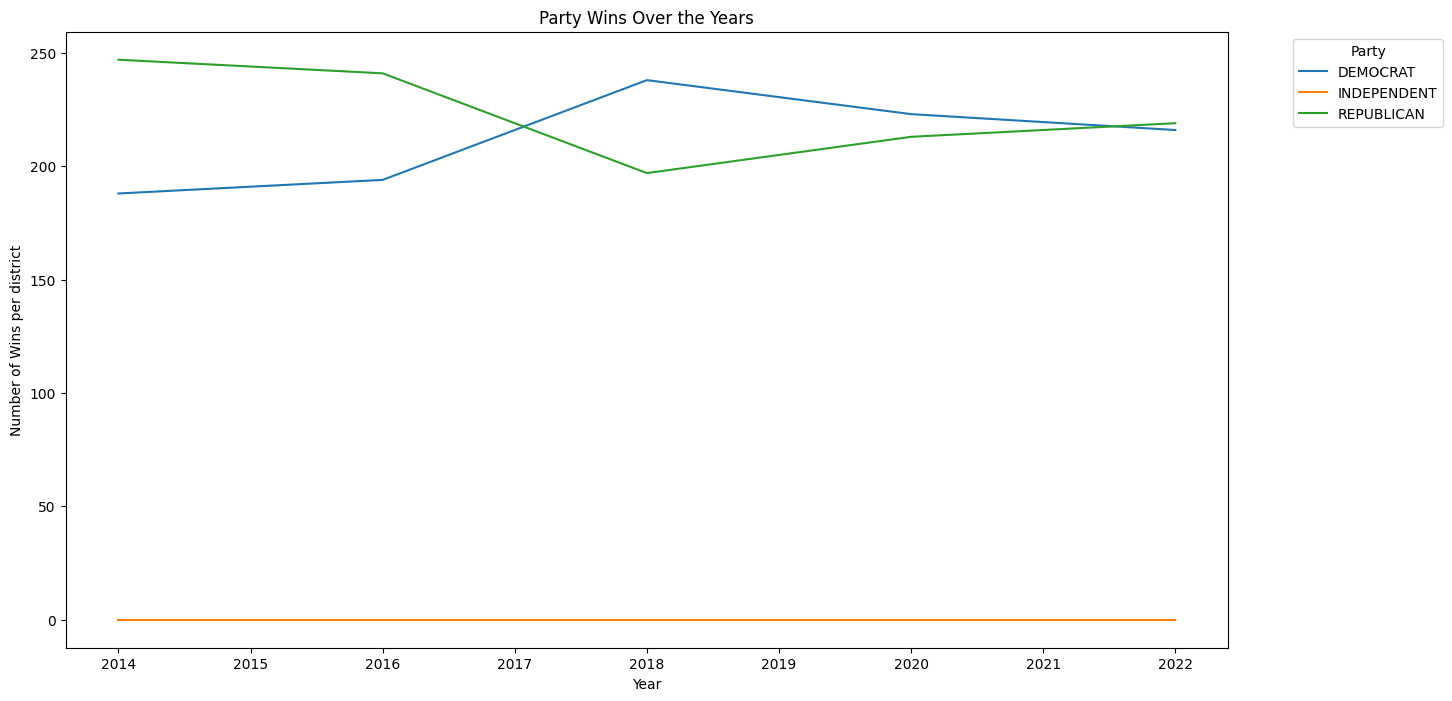

Mean wins per party:
         party   cont
0     DEMOCRAT  211.8
1  INDEPENDENT    0.0
2   REPUBLICAN  223.4

stnd deviation wins per party:
         party       cont
0     DEMOCRAT  20.692994
1  INDEPENDENT   0.000000
2   REPUBLICAN  20.562101


In [203]:
#todo: fare considerazioni sui numeri e su informazioni aggiuntive 
#occ per la combinazione di year e party
wins_per_year = df_ys_date.groupby(['year', 'party']).size().reset_index(name='cont')
# Pivot: 'party' come colonne
pivot_df = wins_per_year.pivot(index='year', columns='party', values='cont').fillna(0)
pivot_df.plot(kind='line', figsize=(15, 8))
plt.xlabel('Year')
plt.ylabel('Number of Wins per district')
plt.title('Party Wins Over the Years')
plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


mean_wins_party = wins_per_year.groupby('party')['cont'].mean().reset_index()
dev_st_wins_party = wins_per_year.groupby('party')['cont'].std().reset_index()

print("Mean wins per party:")
print(mean_wins_party)

print("\nstnd deviation wins per party:")
print(dev_st_wins_party)